<a href="https://colab.research.google.com/github/Saiganesh17/CppPatterns/blob/main/HDFS_basics_hands_on_PCC_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCC-LAB Experiment**

**By, Dr. Deepsubhra Guha Roy**


**Introduction**

Hadoop is an open-source framework that allows the storage and processing of big data in a distributed environment across clusters of computers using simple programming models. It is designed to scale up from single servers to thousands of machines, each offering local computation and storage.

Apache Software Foundation is the developer of Hadoop, and its co-founders are Doug Cutting and Mike Cafarella. Its co-founder Doug Cutting named it on his son’s toy elephant. In October 2003 the first paper release was Google File System. In January 2006, MapReduce development started on the Apache Nutch which consisted of around 6000 lines of code for it and around 5000 lines of code for HDFS. In April 2006 Hadoop 0.1.0 was released.

Apache Hadoop is a collection of open-source software utilities that facilitates using a network of many computers to solve problems involving massive amounts of data and computation. It provides a software framework for distributed storage and processing of big data using the MapReduce programming model. Hadoop was originally designed for computer clusters built from commodity hardware, which is still common use. It has since also found use on clusters of higher-end hardware. All the modules in Hadoop are designed with a fundamental assumption that hardware failures are common occurrences and should be automatically handled by the framework.




**Components of Hadoop**

The core of Apache Hadoop consists of a storage part, known as Hadoop Distributed File System (HDFS), and a processing part which is a MapReduce programming model. Hadoop splits files into large blocks and distributes them across nodes in a cluster. It then transfers the packaged code into nodes to process the data in parallel. This approach takes advantage of data locality, where nodes manipulate the data they have access to and allows the dataset to be processed faster and more efficiently.

The components of Hadoop are as follows:


*   Storage unit - Hadoop HDFS(Hadoop Distributed File System) For Today

*   Processing unit - Hadoop MapReduce

*   Resource management unit - Hadoop YARN(Yet Another Resource Negotiator)






**Hadoop HDFS**

Hadoop File System was developed using distributed file system design. It is run on commodity hardware. Unlike other distributed systems, HDFS is highly fault tolerant and designed using low-cost hardware.

It holds very large amount of data and provides easier access. To store such huge data, the files are stored across multiple machines. These files are stored in a redundant fashion to rescue the system from possible data losses in case of failure. HDFS also makes applications available to parallel processing.



**Features of HDFS**

*   Suitable for the distributed storage and processing
*   Hadoop provides a command interface to interact with HDFS
*   The built-in servers of namenode and datanode help users to easily check the status of the cluster
*   Streaming access to file system data
*   HDFS provides file permissions and authentication


**Name Node**

HDFS consists of only one Name Node that is called the Master Node. The master node can track files, manage the file system and has the metadata of all of the stored data within it. In particular, the name node contains the details of the number of blocks, locations of the data node that the data is stored in, where the replications are stored, and other details. The name node has direct contact with the client.


**Data Node**

A Data Node stores data in it as blocks. This is also known as the slave node and it stores the actual data into HDFS which is responsible for the client to read and write. These are slave daemons. Every Data node sends a Heartbeat message to the Name node every 3 seconds and conveys that it is alive. In this way when Name Node does not receive a heartbeat from a data node for 2 minutes, it will take that data node as dead and start the process of block replications on some other Data node.





**Installing Hadoop Client Locally**

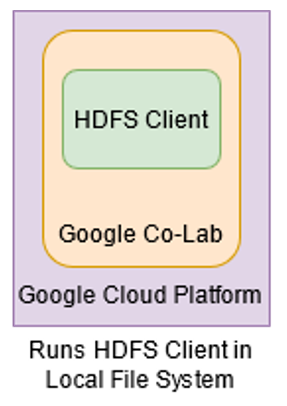

In [2]:
#Downloading the hadoop zip file
!wget -qq https://downloads.apache.org/hadoop/common/hadoop-3.3.0/hadoop-3.3.0.tar.gz

In [3]:
# Unzipping the hadoop zip file
!tar -xzvf hadoop-3.3.0.tar.gz

tar (child): hadoop-3.3.0.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


Copying the Hadoop file to user/local directory


In [4]:
# copy  hadoop file to user/local
!cp -r hadoop-3.3.0/ /usr/local/

cp: cannot stat 'hadoop-3.3.0/': No such file or directory


**Configuring Hadoop’s Java-Home**

Hadoop requires that you set the path to Java, either as an environment variable or in the Hadoop configuration file.


In [5]:
#To find the default Java path
!readlink -f /usr/bin/java | sed "s:bin/java::"

/usr/lib/jvm/java-11-openjdk-amd64/


In [6]:
#set the java environment variable using os
import os
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-11-openjdk-amd64/'


In [7]:
#Running Hadoop

!/usr/local/hadoop-3.3.0/bin/hadoop

/bin/bash: line 1: /usr/local/hadoop-3.3.0/bin/hadoop: No such file or directory


**HDFS Hands On**

Let’s run few hadoop commands to test installation.

Browse hadoop root directory

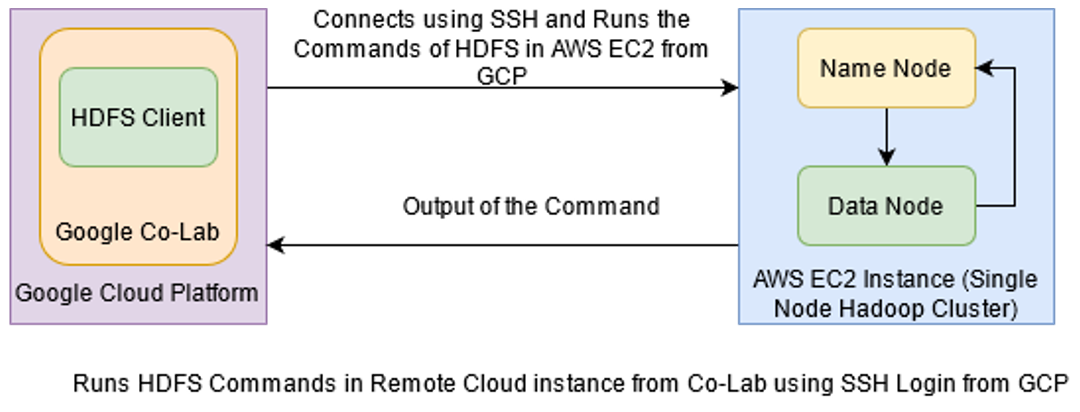

What is the Remote Execution Script here?

It just a wrapper script to wrapping the following contents:

!ssh -o StrictHostKeyChecking=no -i /content/deepsubhra_new.pem hadoop_user@ec2-15-206-167-191.ap-south-1.compute.amazonaws.com

**Setting the permission of the Remote Execution Script**

In [8]:
!chmod u+x /content/remote_exec.sh

chmod: cannot access '/content/remote_exec.sh': No such file or directory


**Setting Permission of pem file for SSH connection to remote instance in AWS EC2**

In [9]:
!chmod 400 /content/deepsubhra_new.pem

chmod: cannot access '/content/deepsubhra_new.pem': No such file or directory


In [10]:
#!hdfs dfs -ls /
! /content/remote_exec.sh  /usr/local/hadoop/bin/hdfs dfs -ls /

/bin/bash: line 1: /content/remote_exec.sh: No such file or directory


**Create a test hadoop directory**

In [11]:
#!hdfs dfs -mkdir /dir-name
!/content/remote_exec.sh  /usr/local/hadoop/bin/hdfs dfs -mkdir /<Firstname_Random_number>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `/content/remote_exec.sh  /usr/local/hadoop/bin/hdfs dfs -mkdir /<Firstname_Random_number>'


# Create a test file and upload it to hadoop

**Create a test file on the local file system of the remote machine**

In [12]:
# We create a file on the local file system of the remote machine and add a text to it
# Replace YourFirstName_RandomNumber.txt and add a file name of your choice
!/content/remote_exec.sh "echo (Add any text here remove the parantheses) > /home/hadoop_user/YourFirstName_RandomNumber.txt"

/bin/bash: line 1: /content/remote_exec.sh: No such file or directory


**Check if the file is created on the local file system**

In [13]:
# Replace <name of file that you gave above> with file name created above including the .txt
!/content/remote_exec.sh cat /home/hadoop_user/<name of file that you gave above>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `/content/remote_exec.sh cat /home/hadoop_user/<name of file that you gave above>'


# Move the file from Local File System to HDFS


```
hdfs dfs -moveFromLocal /path-to-file-on-local-file-system

              OR

hdfs dfs -put /path-to-file-on-local-file-system         
```



In [14]:
# Replace the template name within <> with the name of the file created above and remove <>

# !/content/remote_exec.sh /usr/local/hadoop/bin/hdfs dfs -put /home/hadoop_user/<file name created above> /

!/content/remote_exec.sh /usr/local/hadoop/bin/hdfs dfs -moveFromLocal /home/hadoop_user/<file name created above> /

/bin/bash: line 1: file: No such file or directory


**Check if the file was added to the HDFS**

In [15]:
!/content/remote_exec.sh /usr/local/hadoop/bin/hdfs dfs -ls /

/bin/bash: line 1: /content/remote_exec.sh: No such file or directory


**Print the contents of uploaded file from within HDFS**

In [16]:
# Replace the template name within <> with the name of the file created above and remove <>
!/content/remote_exec.sh /usr/local/hadoop/bin/hdfs dfs -cat /<file name created above>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `/content/remote_exec.sh /usr/local/hadoop/bin/hdfs dfs -cat /<file name created above>'


# Trying to display 1kb of file test from HDFS

In [17]:
# Here the large_log_file.log is already present on the HDFS of the remote machine
!/content/remote_exec.sh /usr/local/hadoop/bin/hdfs dfs -tail /large_log_file.log

/bin/bash: line 1: /content/remote_exec.sh: No such file or directory


# Get a file from HDFS to Local file system



```
 hdfs dfs -get /path-to-file-on-HDFS /path-on-local-FS
```



In [18]:
# Here the test_file.txt is already present on the HDFS of the remote machine
!/content/remote_exec.sh /usr/local/hadoop/bin/hdfs dfs -get /test_file.txt /home/hadoop_user

/bin/bash: line 1: /content/remote_exec.sh: No such file or directory


**Check whether the file is fetched on the local system**

In [19]:
!/content/remote_exec.sh cat /home/hadoop_user/test_file.txt

/bin/bash: line 1: /content/remote_exec.sh: No such file or directory


# Shows Capacilty Size Used Available in HDFS

In [20]:
#!hdfs dfs -df
!/content/remote_exec.sh /usr/local/hadoop/bin/hdfs dfs -df

/bin/bash: line 1: /content/remote_exec.sh: No such file or directory


# Check the Health of the files of directory in HDFS

In [21]:
#!hdfs fsck /
!/content/remote_exec.sh /usr/local/hadoop/bin/hdfs fsck /

/bin/bash: line 1: /content/remote_exec.sh: No such file or directory


# For HDFS Report

In [22]:
!/content/remote_exec.sh /usr/local/hadoop/bin/hdfs dfsadmin -report

/bin/bash: line 1: /content/remote_exec.sh: No such file or directory


**Install Hadoop HDFS on Single Node Cluster**

To create this environment, One machine is required. It may be physical machine or any local VM or any cloud instance.

**Create New Server**

Install any virtualization software for creating new local VM for creating the server.
Or,
create a new VM with any CSP using Ubuntu. Create an instance with **high RAM** and CPU if possible to support various hadoop java processes.

Connect that machine locally or with SSH.



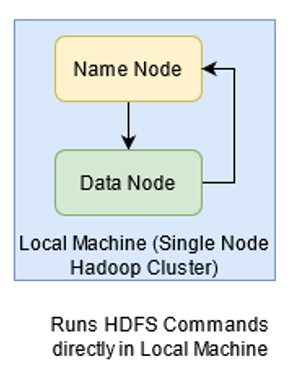





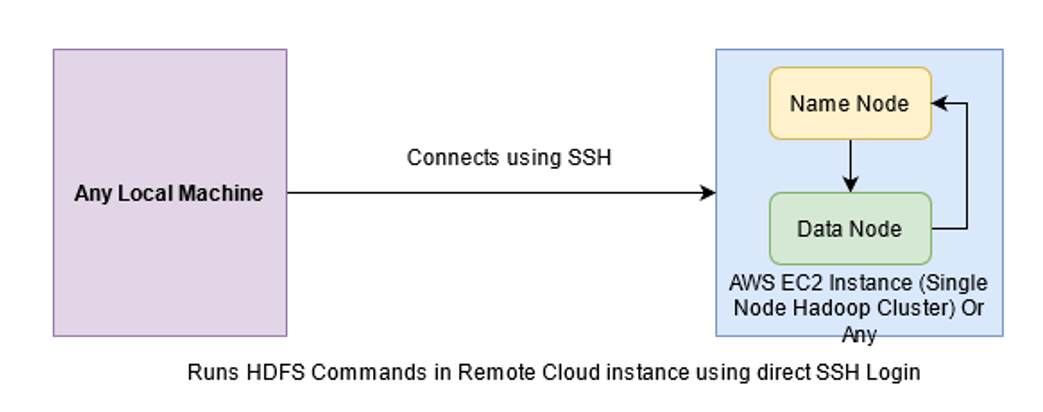

**Let's Login**

Create a new user as “hadoop_user” and give sudo access to this new user. Then login as hadoop_user.

You can login to that machine and create the environment over there or you can connect your machine with Colab, then you can execute the following commands otherwise you have to remove the '!' from every command.

In [ ]:
!adduser hadoop_user
#Set and confirm the new user’s password at the prompt and keep it in your mind.

#Add user to sudo group
!usermod -aG sudo hadoop_user

#Change current user as hadoop_user or logout and log back in with hadoop_user
!sudo su - hadoop_user

Adding user `hadoop_user' ...
Adding new group `hadoop_user' (1000) ...
Adding new user `hadoop_user' (1000) with group `hadoop_user' ...
Creating home directory `/home/hadoop_user' ...
Copying files from `/etc/skel' ...
New password: 

Once logged in as hadoop_user, Update repositories using below command.

In [ ]:
!sudo apt-get update

Install latest version of JDK using below command. And check java version once installation is complete.

In [ ]:
!sudo apt-get install default-jdk

!java -version

Take note of java version and find java install directory.

To find java install directory, use “which” command and “readlink” command as shown below.

In [ ]:
!which java
#Output: /usr/bin/java

!readlink /usr/bin/java
#Output: /etc/alternatives/java

!readlink /etc/alternatives/java
#Output: /usr/lib/jvm/java-11-openjdk-amd64/jre/bin/java

Take a note of above java path. This will be JAVA_HOME path in next few steps.

**Download Hadoop**

Go to Hadoop site and copy latest link of Hadoop .tar.gz file from any mirror site.

http://hadoop.apache.org/releases.html

Download Hadoop .tar.gz file using wget command in Downloads directory

In [ ]:
!mkdir ~/Downloads
!cd ~/Downloads
!wget http://apache.forsale.plus/hadoop/common/hadoop-3.3.0/hadoop-3.3.0.tar.gz

Extract .tar.gz file.

In [ ]:
!tar -zxvf hadoop-3.3.0.tar.gz

Move extracted hadoop directory to /usr/local/hadoop

In [ ]:
!sudo mv hadoop-3.3.0 /usr/local/hadoop

**Set Environment Variables**

Edit .bashrc file and set environment variables as shown. These variables are important.

In [ ]:
!vim ~/.bashrc

In ~/.bashrc file, add below lines at the end of file and save it.

In [ ]:
export JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64
export PATH=$PATH:$JAVA_HOME/bin
export HADOOP_HOME=/usr/local/hadoop
export PATH=$PATH:$HADOOP_HOME/bin
export PATH=$PATH:$HADOOP_HOME/sbin
export HADOOP_CONF_DIR=/usr/local/hadoop/etc/hadoop
export HADOOP_CLASSPATH=/usr/lib/jvm/java-11-openjdk-amd64/lib/tools.jar

Take a note of JAVA HOME variable, we have used path that we found earlier using “which” and “readlink” commands. You may need to change this path if you are using different version of java.


Reload environment variables. Or logout and log back in.

In [ ]:
!source ~/.bashrc

**Configure Hadoop**

Add Java home path in hadoop-env.sh file

In [ ]:
!vim $HADOOP_CONF_DIR/hadoop-env.sh

Add below line in this file.

In [ ]:
export JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64

Edit hadoop core site xml file.

In [ ]:
!vim $HADOOP_CONF_DIR/core-site.xml

Add below lines in core-site.xml. Make sure IP address is reflected for NameNode. Use Internal IP address or internal hostname of google cloud VM here. Do not use localhost here as you will need to access webpage from external ip address later. Or you can use 0.0.0.0 to bind service to all available ip addresses. 54310 is HDFS port.

In [ ]:
#In between two configuration tags
<property>
<name>fs.defaultFS</name>
<value>hdfs://0.0.0.0:54310</value>
</property>

Edit yarn site settings and add lines as shown.

In [ ]:
!vim $HADOOP_CONF_DIR/yarn-site.xml

Add/update below lines in yarn-site.xml. Change ip x.x.x.x as per your VM’s internal ip or host name. Take a note of port 5349 which is set for accessing resource manager web page.

In [ ]:
#In between two configuration tags

<property>
<name>yarn.nodemanager.aux-services</name>
<value>mapreduce_shuffle</value>
</property>
<property>
<name>yarn.nodemanager.aux-services.mapreduce.shuffle.class</name>
<value>org.apache.hadoop.mapred.ShuffleHandler</value>
</property>
<property>
<name>yarn.resourcemanager.hostname</name>
<value>x.x.x.x</value>
</property>
<property>
<name>yarn.resourcemanager.webapp.address</name>
<value>${yarn.nodemanager.hostname}:5349</value>
</property>
<property>
<name>yarn.nodemanager.webapp.address</name>
<value>${yarn.nodemanager.hostname}:5249</value>
</property>

Edit mapred-site.xml file and Add below lines.

In [ ]:
!vim $HADOOP_CONF_DIR/mapred-site.xml

Add/update below configuration in mapred-site.xml.

In [ ]:
#In between two configuration tags

<property>
<name>mapreduce.jobtracker.address</name>
<value>0.0.0.0:54311</value>
</property>
<property>
<name>mapreduce.framework.name</name>
<value>yarn</value>
</property>

Edit hdfs-site settings and add replication factor, name node and data node directories

In [ ]:
!vim $HADOOP_CONF_DIR/hdfs-site.xml

Add/update below configuration in hdfs-site.xml.

In [ ]:
#In between two configuration tags


<property>
<name>dfs.replication</name>
<value>3</value>
</property>
<property>
<name>dfs.namenode.name.dir</name>
<value>file:///usr/local/hadoop/hadoop_data/hdfs/namenode </value>
</property>
<property>
<name>dfs.datanode.data.dir</name>
<value>file:///usr/local/hadoop/hadoop_data/hdfs/datanode</value>
</property>
<property>
<name>dfs.webhdfs.enabled</name>
<value>true</value>
</property>

**Create data directories**

In [ ]:
!mkdir -p $HADOOP_HOME/hadoop_data/hdfs/namenode
!mkdir -p $HADOOP_HOME/hadoop_data/hdfs/datanode

Create masters file, Add internal ip address/hostname line in this file.

In [ ]:
!vim $HADOOP_CONF_DIR/masters

Add below line. Replace ip address with your VM internal ip.

In [ ]:
X.X.X.X

Create Slaves file. Add internal ip address/hostname in this file. For single node setup it’s just one line. If you were to do multi node setup, you would add multiple ip addresses in this file.

In [ ]:
!vim $HADOOP_CONF_DIR/slaves

Add below line. Replace ip address with your VM internal ip.

In [ ]:
X.X.X.X

Now all configurations are complete. We need to format namenode. Use below command.

In [ ]:
!hdfs namenode -format

**Setup Authorization**

Setup SSH Keys for current user to have passwordless access to localhost. Generate new SSH key and copy it to authorized keys file as shown

In [ ]:
!ssh-keygen

Add generated key to authorized_keys file.

In [ ]:
!cat ~/.ssh/id_rsa.pub >> ~/.ssh/authorized_keys

Try ssh command now on internal ip address of VM and localhost. It should be able to login without password. Add fingerprint to known_host file when prompted by SSH command.

In [ ]:
!ssh localhost
!ssh x.x.x.x
!ssh 0.0.0.0

Edit hosts file and bind localhost to internal ip address of VM.

In [ ]:
!sudo vim /etc/hosts

Add/Modify below line to point to internal IP address of VM. This way localhost will be bound to an ip address instead of 127.0.0.1. This is needed in case some of hadoop services start on localhost instead of internal ip address and we need to access them from outside VM.

In [ ]:
X.X.X.X  localhost

**Start Hadoop Services**

All configurations are now complete. Start HDFS, YARN and History server using below commands.

In [ ]:
!$HADOOP_HOME/sbin/start-dfs.sh
!$HADOOP_HOME/sbin/start-yarn.sh
!$HADOOP_HOME/sbin/mr-jobhistory-daemon.sh start historyserver

Run below command to check status of hadoop services

In [ ]:
jps


#Output:
#3650 ResourceManager
#3010 NameNode
#4243 Jps
#3403 SecondaryNameNode
#3789 NodeManager
#3150 DataNode

You can also use below command to see HDFS status.

In [ ]:
!hdfs dfsadmin -report

**Connect Colab and your machine**

In order to allow Colaboratory to connect to your locally running Jupyter server, you'll need to perform the following steps.

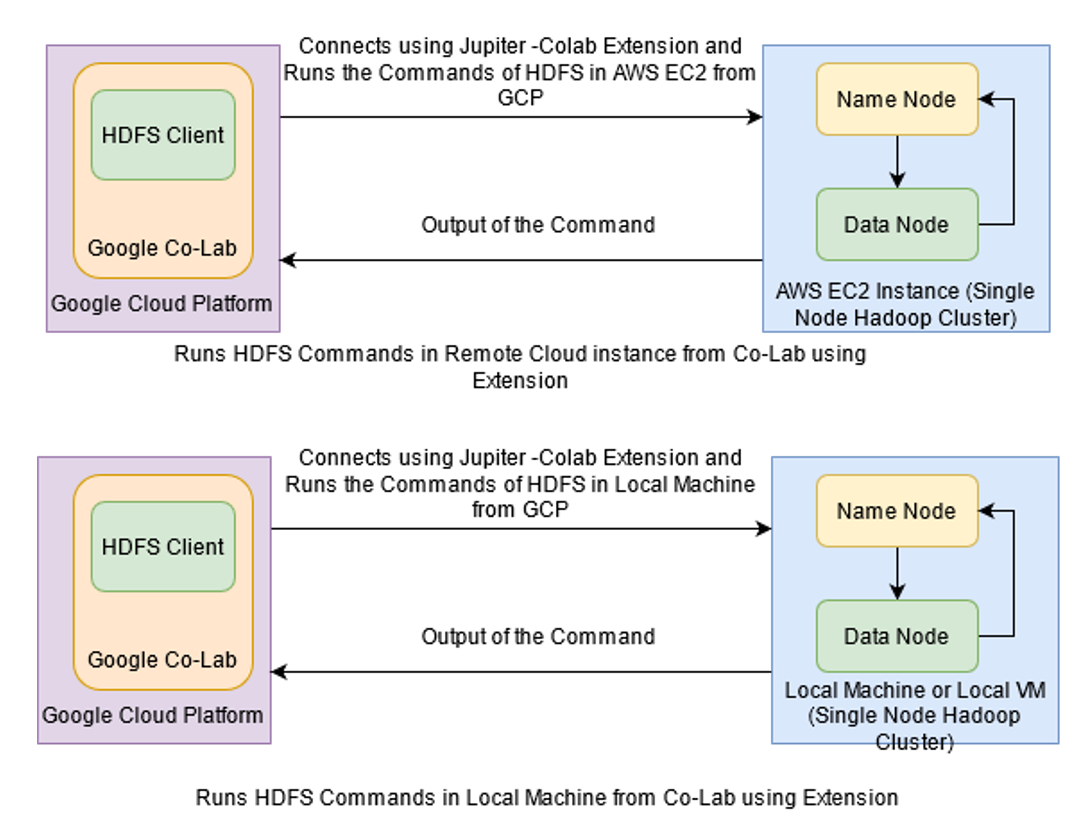

Step 1: Install Jupyter

Install Jupyter on your local machine.

https://jupyter.org/install

Step 2: Install and enable the jupyter_http_over_ws jupyter extension (one-time)

The jupyter_http_over_ws extension is authored by the Colaboratory team and available on GitHub.

https://github.com/googlecolab/jupyter_http_over_ws

In [ ]:
pip install jupyter_http_over_ws
jupyter serverextension enable --py jupyter_http_over_ws

Step 3: Start server and authenticate

New notebook servers are started normally, though you will need to set a flag to explicitly trust WebSocket connections from the Colaboratory frontend.

In [ ]:
jupyter notebook \
  --NotebookApp.allow_origin='https://colab.research.google.com' \
  --port=8888 \
  --NotebookApp.port_retries=0

Once the server has started, it will print a message with the initial backend URL used for authentication. Make a copy of this URL as you'll need to provide this in the next step.

Step 4: Connect to the local runtime

In Colaboratory, click the "Connect" button and select "Connect to local runtime...". Enter the URL from the previous step in the dialog that appears and click the "Connect" button. After this, you should now be connected to your local runtime.

**Perform various Hadoop-HDFS Shell Commands on local file system**



In [ ]:
#Check the version of Hadoop
!/usr/local/hadoop-3.3.0/bin/hadoop version

Hadoop 3.3.0
Source code repository https://gitbox.apache.org/repos/asf/hadoop.git -r aa96f1871bfd858f9bac59cf2a81ec470da649af
Compiled by brahma on 2020-07-06T18:44Z
Compiled with protoc 3.7.1
From source with checksum 5dc29b802d6ccd77b262ef9d04d19c4
This command was run using /usr/local/hadoop-3.3.0/share/hadoop/common/hadoop-common-3.3.0.jar


In [ ]:
#List all the files/directories for the given hdfs destination path
!/usr/local/hadoop-3.3.0/bin/hdfs dfs -ls /

Found 25 items
-rwxr-xr-x   1 root root          0 2021-08-28 04:16 /.dockerenv
drwxr-xr-x   - root root       4096 2021-08-25 13:27 /bin
drwxr-xr-x   - root root       4096 2018-04-24 08:34 /boot
drwxr-xr-x   - root root       4096 2021-08-28 04:53 /content
drwxr-xr-x   - root root       4096 2021-08-25 14:04 /datalab
drwxr-xr-x   - root root        360 2021-08-28 04:16 /dev
drwxr-xr-x   - root root       4096 2021-08-28 04:16 /etc
drwxr-xr-x   - root root       4096 2018-04-24 08:34 /home
drwxr-xr-x   - root root       4096 2021-08-25 13:28 /lib
drwxr-xr-x   - root root       4096 2021-08-25 13:18 /lib32
drwxr-xr-x   - root root       4096 2021-08-25 13:18 /lib64
drwxr-xr-x   - root root       4096 2020-09-21 17:14 /media
drwxr-xr-x   - root root       4096 2020-09-21 17:14 /mnt
drwxr-xr-x   - root root       4096 2021-08-25 13:30 /opt
dr-xr-xr-x   - root root          0 2021-08-28 04:16 /proc
drwx------   - root root       4096 2021-08-28 05:10 /root
drwxr-xr-x   - root root       4

In [ ]:
#Display free space at given hdfs destination
!/usr/local/hadoop-3.3.0/bin/hdfs dfs -df /

In [ ]:
#HDFS Command to create the directory in HDFS

!/usr/local/hadoop-3.3.0/bin/hdfs dfs -mkdir /hadoop-deep

In [ ]:

!/usr/local/hadoop-3.3.0/bin/hdfs dfs -ls /

Found 26 items
-rwxr-xr-x   1 root root          0 2021-08-28 04:16 /.dockerenv
drwxr-xr-x   - root root       4096 2021-08-25 13:27 /bin
drwxr-xr-x   - root root       4096 2018-04-24 08:34 /boot
drwxr-xr-x   - root root       4096 2021-08-28 04:53 /content
drwxr-xr-x   - root root       4096 2021-08-25 14:04 /datalab
drwxr-xr-x   - root root        360 2021-08-28 04:16 /dev
drwxr-xr-x   - root root       4096 2021-08-28 04:16 /etc
drwxr-xr-x   - root root       4096 2021-08-28 06:15 /hadoop-deep
drwxr-xr-x   - root root       4096 2018-04-24 08:34 /home
drwxr-xr-x   - root root       4096 2021-08-25 13:28 /lib
drwxr-xr-x   - root root       4096 2021-08-25 13:18 /lib32
drwxr-xr-x   - root root       4096 2021-08-25 13:18 /lib64
drwxr-xr-x   - root root       4096 2020-09-21 17:14 /media
drwxr-xr-x   - root root       4096 2020-09-21 17:14 /mnt
drwxr-xr-x   - root root       4096 2021-08-25 13:30 /opt
dr-xr-xr-x   - root root          0 2021-08-28 04:16 /proc
drwx------   - root root 

In [ ]:
#HDFS command to remove the entire directory and all of its content from HDFS

!/usr/local/hadoop-3.3.0/bin/hdfs dfs -rm -r /hadoop-deep


2021-08-28 06:15:19,281 INFO Configuration.deprecation: io.bytes.per.checksum is deprecated. Instead, use dfs.bytes-per-checksum
Deleted /hadoop-deep


In [ ]:
!/usr/local/hadoop-3.3.0/bin/hdfs dfs -ls /

Found 25 items
-rwxr-xr-x   1 root root          0 2021-08-28 04:16 /.dockerenv
drwxr-xr-x   - root root       4096 2021-08-25 13:27 /bin
drwxr-xr-x   - root root       4096 2018-04-24 08:34 /boot
drwxr-xr-x   - root root       4096 2021-08-28 04:53 /content
drwxr-xr-x   - root root       4096 2021-08-25 14:04 /datalab
drwxr-xr-x   - root root        360 2021-08-28 04:16 /dev
drwxr-xr-x   - root root       4096 2021-08-28 04:16 /etc
drwxr-xr-x   - root root       4096 2018-04-24 08:34 /home
drwxr-xr-x   - root root       4096 2021-08-25 13:28 /lib
drwxr-xr-x   - root root       4096 2021-08-25 13:18 /lib32
drwxr-xr-x   - root root       4096 2021-08-25 13:18 /lib64
drwxr-xr-x   - root root       4096 2020-09-21 17:14 /media
drwxr-xr-x   - root root       4096 2020-09-21 17:14 /mnt
drwxr-xr-x   - root root       4096 2021-08-25 13:30 /opt
dr-xr-xr-x   - root root          0 2021-08-28 04:16 /proc
drwx------   - root root       4096 2021-08-28 05:10 /root
drwxr-xr-x   - root root       4

In [ ]:
!/usr/local/hadoop-3.3.0/bin/hdfs dfs -ls /

In [ ]:
#List all the files/directories for the given hdfs destination path

!/usr/local/hadoop-3.3.0/bin/hdfs dfs -lsr /